In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, Flatten, Dense, Dropout
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.optimizers import Adam, RMSprop


(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the data to include the channel dimension
x_train = train_images.reshape(-1, 28, 28, 1)
x_test = test_images.reshape(-1, 28, 28, 1)

In [4]:
# Define the Model Architecture
model = models.Sequential([
    Input(shape=(28, 28, 1)),
    
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
   
    layers.Conv2D(128, (3, 3), activation='relu'),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# model.compile(optimizer=RMSprop(learning_rate=0.001),
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# Train the Model
history = model.fit(x_train, train_labels, epochs=15, batch_size=128, validation_split=0.2)

# Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6319 - loss: 1.0224 - val_accuracy: 0.8363 - val_loss: 0.4422
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8318 - loss: 0.4654 - val_accuracy: 0.8669 - val_loss: 0.3594
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8661 - loss: 0.3800 - val_accuracy: 0.8869 - val_loss: 0.3073
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8784 - loss: 0.3374 - val_accuracy: 0.8917 - val_loss: 0.2983
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8919 - loss: 0.2998 - val_accuracy: 0.8972 - val_loss: 0.2801
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9021 - loss: 0.2772 - val_accuracy: 0.8984 - val_loss: 0.2742
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9058 - loss: 0.2613 - val_accuracy: 0.9035 - val_loss: 0.2580
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9120 - loss: 0.2500 - val_accuracy: 0

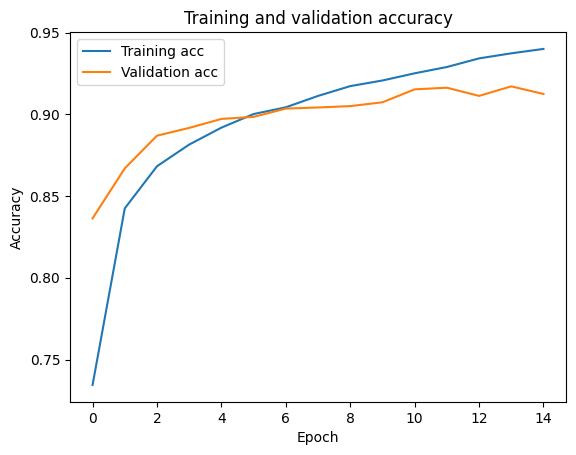

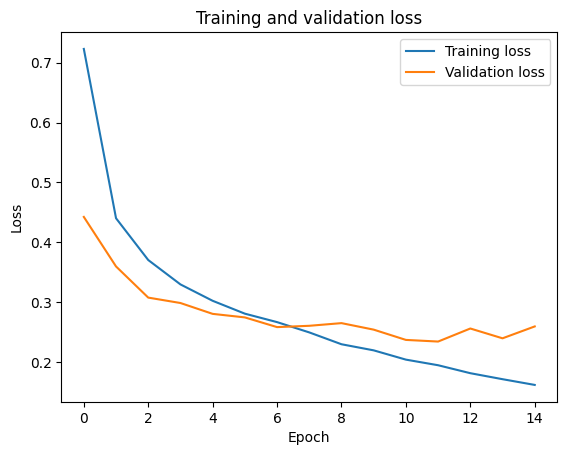

In [5]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training acc', 'Validation acc'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training loss', 'Validation loss'], loc='upper right')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy on sampled images: 1.0000
The neural network made 0 errors out of 10 images.


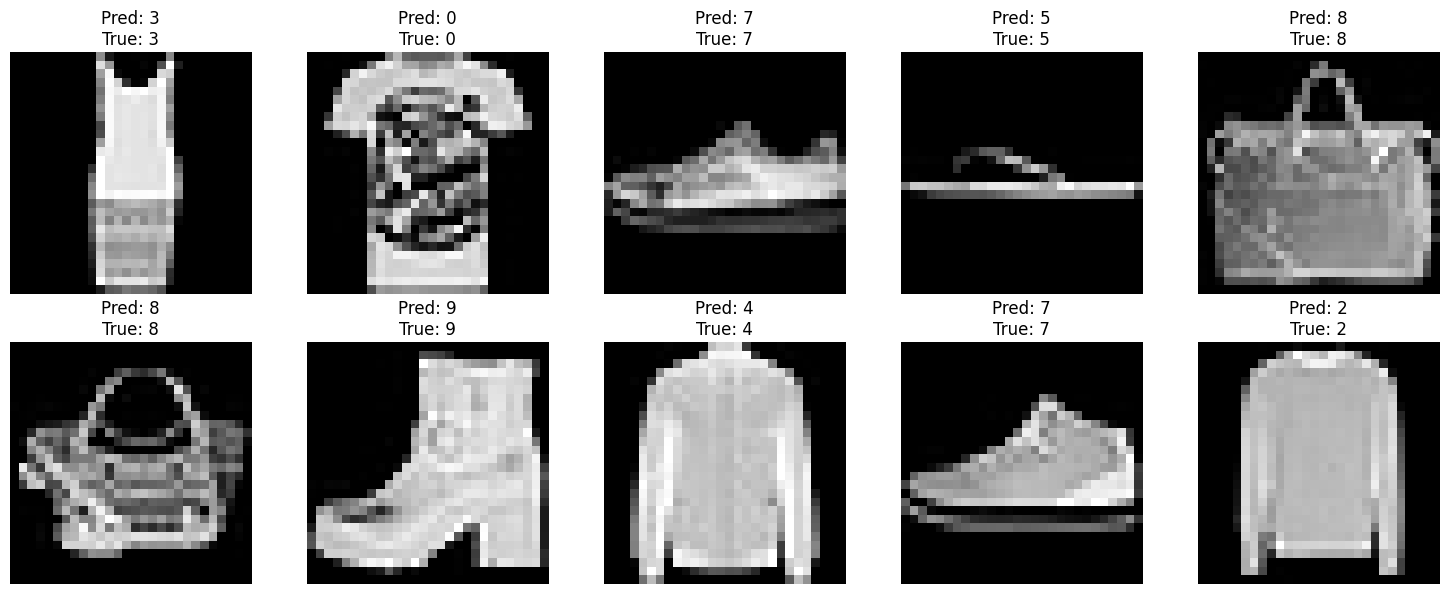

In [7]:
# Generate predictions
predictions = model.predict(x_test)

# Convert the predictions from one-hot encoding to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Sample 10 random images from the test set
num_samples = 10
random_indices = np.random.choice(x_test.shape[0], num_samples, replace=False)
sample_images = x_test[random_indices]
sample_labels = test_labels[random_indices]
sample_predictions = predicted_labels[random_indices]

# Calculate accuracy on the sampled images
correct_predictions = np.equal(sample_predictions, sample_labels)
accuracy_sample = np.mean(correct_predictions)
print(f"Accuracy on sampled images: {accuracy_sample:.4f}")

# Count the number of errors
error_count = np.sum(~correct_predictions)
print(f"The neural network made {error_count} errors out of {num_samples} images.")

# Visualize the sampled images with their predicted and true labels
plt.figure(figsize=(15, 6))
for i, (image, true_label, pred_label) in enumerate(zip(sample_images, sample_labels, sample_predictions)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()
